In [7]:
#Will Utlizie TopDownHockey EliteProspects Scraper

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import TopDownHockey_Scraper.TopDownHockey_EliteProspects_Scraper as tdhepscrape

In [8]:
#scrape the data

# These are both lists, and each of them contain two strings. We use the equals sign to assign these lists to a named object which gets stored and can be used later.

leagues = ["ahl", "nhl"]
seasons = ["2017-2018", "2018-2019"]

# The get_skaters command not only returns a dataframe once it is completed, but also prints out messages as it runs in order to keep you updated on its progress.

ahl_nhl_skaters_1719 = tdhepscrape.get_skaters(leagues, seasons)

Your scrape request is skater data from the following leagues:
ahl and nhl
In the following seasons:
2017-2018 and 2018-2019
Beginning scrape of ahl skater data from 2017-2018.
Successfully scraped all ahl skater data from 2017-2018.
Beginning scrape of ahl skater data from 2018-2019.
Successfully scraped all ahl skater data from 2018-2019.
Scraping ahl data is complete. You scraped skater data from 2017-2018 and 2018-2019.
Beginning scrape of nhl skater data from 2017-2018.
Successfully scraped all nhl skater data from 2017-2018.
Beginning scrape of nhl skater data from 2018-2019.
Successfully scraped all nhl skater data from 2018-2019.
Scraping nhl data is complete. You scraped skater data from 2017-2018 and 2018-2019.
Completed scraping skater data from the following leagues:
ahl and nhl
Incorporating the following seasons:
2017-2018 and 2018-2019


In [9]:
#Clean the Data

# drop syntax: dataframe.drop(columns = 'my_column_to_drop')
ahl_nhl_skaters_1719 = ahl_nhl_skaters_1719.drop(columns = 'player')

#Use str.strip() to get rid of white space at beginning or end of names of players 
ahl_nhl_skaters_1719.playername = ahl_nhl_skaters_1719.playername.str.strip()

In [10]:
# Here we use loc to filter out columns with a certain name. We use :, then pass a list of column names in brackets to locate columns rather than rows.

# loc syntax for locating by column name: dataframe.loc[:, ['column_to_keep_one', 'column_to_keep_two']]

ahl_nhl_skaters_1719 = ahl_nhl_skaters_1719.loc[:, ['playername', 'team', 'season', 'league', 'position', 'gp', 'g', 'a', 'tp', 'ppg', 'pim', '+/-', 'link']]

#rename syntax: dataframe.rename(columns = {'old_column_name':'new_column_name'})

ahl_nhl_skaters_1719 = ahl_nhl_skaters_1719.rename(columns = {'playername':'player'})

ahl_nhl_skaters_1719

,player,team,season,league,position,gp,g,a,tp,ppg,pim,+/-,link
0,Chris Terry,Laval Rocket,2017-2018,ahl,LW/RW,62,32,39,71,1.15,45,-33,https://www.eliteprospects.com/player/14370/ch...
1,Phil Varone,Lehigh Valley Phantoms,2017-2018,ahl,C/W,74,23,47,70,0.95,36,9,https://www.eliteprospects.com/player/15485/ph...
2,Austin Czarnik,Providence Bruins,2017-2018,ahl,C/RW,64,25,44,69,1.08,24,18,https://www.eliteprospects.com/player/20707/au...
3,Mason Appleton,Manitoba Moose,2017-2018,ahl,C/RW,76,22,44,66,0.87,57,14,https://www.eliteprospects.com/player/266919/m...
4,Daniel Sprong,Wilkes-Barre/Scranton Penguins,2017-2018,ahl,RW/LW,65,32,33,65,1.00,28,4,https://www.eliteprospects.com/player/231299/d...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,Eric Robinson,Columbus Blue Jackets,2018-2019,nhl,LW,13,0,0,0,0.00,0,-4,https://www.eliteprospects.com/player/206755/e...
4084,Nate Prosser,Minnesota Wild,2018-2019,nhl,D,15,0,0,0,0.00,2,1,https://www.eliteprospects.com/player/38197/na...
4085,Trent Frederic,Boston Bruins,2018-2019,nhl,C/LW,15,0,0,0,0.00,15,-4,https://www.eliteprospects.com/player/272221/t...
4086,Joel Hanley,Dallas Stars,2018-2019,nhl,D,16,0,0,0,0.00,2,0,https://www.eliteprospects.com/player/33730/jo...


In [11]:
#Prepare Data for Analysis 

#Build two dataframes, one for the 2017-2018 AHL season and one for the 2018-2019 NHL season.

ahl_skaters_1718 = ahl_nhl_skaters_1719.loc[(ahl_nhl_skaters_1719.season=="2017-2018") & (ahl_nhl_skaters_1719.league=="ahl")]

nhl_skaters_1819 = ahl_nhl_skaters_1719.loc[(ahl_nhl_skaters_1719.season=="2018-2019") & (ahl_nhl_skaters_1719.league=="nhl")]

In [12]:
#Merge the two dataframes
ahl_1718_nhl_1819 = ahl_skaters_1718.merge(nhl_skaters_1819, on = 'link', how = 'inner')
ahl_1718_nhl_1819 = ahl_1718_nhl_1819.drop(columns = ['season_x', 'league_x', 'season_y', 'league_y', 'player_y', 'position_y'])

In [13]:
#Get List of Columns
my_columns = list(ahl_1718_nhl_1819.columns)

my_columns.remove('link')

my_columns.append('link')

my_columns

['player_x',
 'team_x',
 'position_x',
 'gp_x',
 'g_x',
 'a_x',
 'tp_x',
 'ppg_x',
 'pim_x',
 '+/-_x',
 'team_y',
 'gp_y',
 'g_y',
 'a_y',
 'tp_y',
 'ppg_y',
 'pim_y',
 '+/-_y',
 'link']

In [14]:
#Update dataframe with new columns names
ahl_1718_nhl_1819 = ahl_1718_nhl_1819.loc[:, my_columns]

ahl_1718_nhl_1819 = ahl_1718_nhl_1819.rename(columns = {'player_x':'player', 'team_x':'ahl_team', 'position_x':'position', 'gp_x':'ahl_gp', 
                                                        'g_x':'ahl_g', 'a_x':'ahl_a', 'tp_x':'ahl_p', 'ppg_x':'ahl_ppg', 'pim_x':'ahl_pim', 
                                                        '+/-_x':'ahl_+/-', 'team_y':'nhl_team', 'gp_y':'nhl_gp', 'g_y':'nhl_g', 'a_y':'nhl_a', 
                                                        'tp_y':'nhl_p', 'ppg_y':'nhl_ppg', 'pim_y':'nhl_pim', '+/-_y':'nhl_+/-'})

In [15]:
#Clean dataframe
ahl_1718_nhl_1819.ahl_ppg = np.where(ahl_1718_nhl_1819.ahl_ppg=="-", 0, ahl_1718_nhl_1819.ahl_ppg)
ahl_1718_nhl_1819.nhl_ppg = np.where(ahl_1718_nhl_1819.nhl_ppg=="-", 0, ahl_1718_nhl_1819.nhl_ppg)

ahl_1718_nhl_1819.ahl_gp = np.where(ahl_1718_nhl_1819.ahl_gp=="-", 0, ahl_1718_nhl_1819.ahl_gp)
ahl_1718_nhl_1819.nhl_gp = np.where(ahl_1718_nhl_1819.nhl_gp=="-", 0, ahl_1718_nhl_1819.nhl_gp)

ahl_1718_nhl_1819[ahl_1718_nhl_1819.ahl_ppg=="-"]

#Change to float types for analysis
ahl_1718_nhl_1819.ahl_ppg = ahl_1718_nhl_1819.ahl_ppg.astype(float) 

ahl_1718_nhl_1819.nhl_ppg = ahl_1718_nhl_1819.nhl_ppg.astype(float) 

ahl_1718_nhl_1819.ahl_gp = ahl_1718_nhl_1819.ahl_gp.astype(float) 

ahl_1718_nhl_1819.nhl_gp = ahl_1718_nhl_1819.nhl_gp.astype(float) 

ahl_1718_nhl_1819 = ahl_1718_nhl_1819.loc[(ahl_1718_nhl_1819.ahl_gp>=20) & (ahl_1718_nhl_1819.nhl_gp>=20)]

In [16]:
# First build two separate dataframes; one for forwards, one for defensemen.

forwards = ahl_1718_nhl_1819.loc[ahl_1718_nhl_1819.position!="D"]
defensemen = ahl_1718_nhl_1819.loc[ahl_1718_nhl_1819.position=="D"]

forward_count = len(forwards)
defenseman_count = len(defensemen)

In [17]:
#Get total number of forwards who went from ahl to nhl 
forward_count_string = str(forward_count)
defenseman_count_string = str(defenseman_count)

print("We have the following number of forwards: " + forward_count_string)
print("We have the following number of defensemen: " + defenseman_count_string)

We have the following number of forwards: 77
We have the following number of defensemen: 36


In [18]:
#Analyze the Data
forward_counts = forwards.groupby('nhl_team').player.count()
forward_counts = pd.DataFrame(forward_counts)

forward_counts = forward_counts.sort_values(by = 'player', ascending = False)
forward_counts = forward_counts.reset_index()

nhl_team_set = set(nhl_skaters_1819.team)
nhl_team_df = pd.DataFrame(nhl_team_set)
nhl_team_df = nhl_team_df.rename(columns = {0:'nhl_team'})

# convert object to list

teams_in_transitioning_forwards = list(forward_counts.nhl_team)

#See if teams appear in our list
nhl_team_df.loc[nhl_team_df.nhl_team.isin(teams_in_transitioning_forwards)]

missing_teams = nhl_team_df.loc[~nhl_team_df.nhl_team.isin(teams_in_transitioning_forwards)]
missing_teams = missing_teams.assign(player = 0)

#Join the two together 
full_transitioning_forwards = pd.concat([forward_counts, missing_teams])

# Filter out totals since it is not actually a team.
full_transitioning_forwards = full_transitioning_forwards.loc[full_transitioning_forwards['nhl_team']!='totals']
full_transitioning_forwards = full_transitioning_forwards.reset_index().drop(columns = 'index')

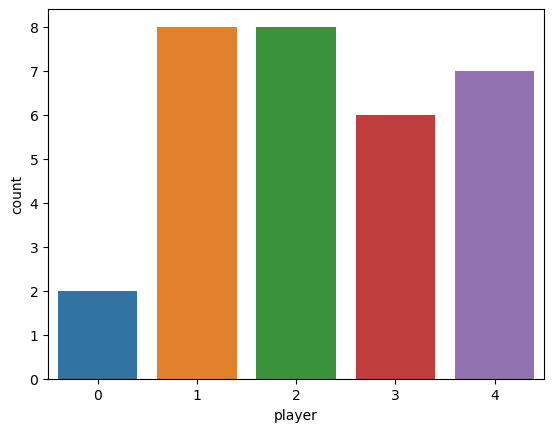

In [19]:
#Visualize the Data

#Show Transitioning Forward, for each team, group by amount of players that went from ahl to nhl 
sns.countplot(full_transitioning_forwards.player)
plt.show()

In [20]:
#Get Pearson R correlation for points per game for the two leagues, and R^2 
correlation_coefficient = (np.corrcoef(ahl_1718_nhl_1819.ahl_ppg, ahl_1718_nhl_1819.nhl_ppg)[0, 1])

RSQ = correlation_coefficient**2

RSQ = round(RSQ, 2)

RSQ

0.17

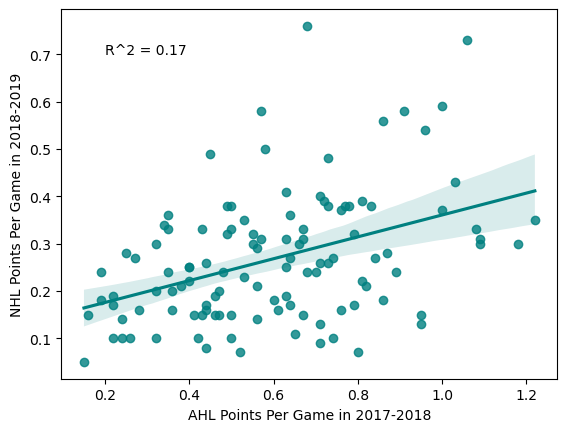

In [21]:
#Visualize the correlation
sns.regplot(x = ahl_1718_nhl_1819.ahl_ppg, y = ahl_1718_nhl_1819.nhl_ppg, color = 'teal')
plt.xlabel("AHL Points Per Game in 2017-2018")
plt.ylabel("NHL Points Per Game in 2018-2019")

# Build a single string for our R^2 value.

RSQString = "R^2 = " + str(RSQ)

# plt.text syntax: plt.text(x-location, y-location, (text))
# We want to print the R^2 value in the top left corner where there isn't much data. We know that the top left corner has an x-value of about 0.2 and y-value of about 0.7.

plt.text(0.2, 0.7, RSQString)

#We add plt.show() to the end just to show only the plot itself without the text at the top.

plt.show()

In [22]:
#Build Model for conversion from ahl to nhl in points
nhl_ppg_average = np.mean(ahl_1718_nhl_1819.nhl_ppg)

ahl_ppg_average = np.mean(ahl_1718_nhl_1819.ahl_ppg)

ahl_nhl_equivalency = nhl_ppg_average/ahl_ppg_average

def obtain_nhle_given_ahl_ppg(ahl_ppg):
    nhle = ahl_ppg * 82 * ahl_nhl_equivalency
    nhle = round(nhle, 2)
    print(nhle)

#1 point per game in ahl, is this function's output per 82 games in nhl
obtain_nhle_given_ahl_ppg(1)

36.67
